In [3]:
from create_loops import *
import networkx as nx
%matplotlib widget 
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from Plateau_Problem.Triangulation_Meshing.tests.definir_cycle  import *


Starting the extraction processus


In [ ]:
with open(ROOT + 'Results/ph_loops.pkl',"rb") as file:
    C = pickle.load(file)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f53d5356410>>
Traceback (most recent call last):
  File "/home/mehdii/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [44]:
smaller_data = np.array(data)[:50,:50,:10]
C = Resiuals(smaller_data)
C.map_nodes()
C.create_graph()
C.create_graph_networkx()
C.untangle_graph()
C.fill_open_paths()
C.detect_cycles()

100%|██████████| 923/923 [00:00<00:00, 820721.35it/s]


now separating the open paths


100%|██████████| 372/372 [00:00<00:00, 9322.29it/s]


In [47]:
C.open_paths = [cycle[::-1] for cycle in C.open_paths]
for open_loop in C.cycles:
    for ind in range(len(open_loop)-1):
        if open_loop[ind+1] not in C.Res_graph[open_loop[ind]]:
            print(open_loop[ind],open_loop[ind+1],open_loop)
            break

34 13721 [33, 13622, 34, 13721]
6826 184 [6826, 184, 6692, 187]
6721 72 [6721, 72, 6592, 75, 6730, 13767, 78, 6595, 13645, 6594, 77, 6729, 6726, 71, 6590, 13640, 69, 13759]
219 13909 [219, 13909, 6872, 222, 13770, 6736, 85, 6599, 13650, 6596, 79, 13768]
6629 13678 [6629, 13678, 6630, 6633, 138, 284, 6931, 280, 13822, 134]
6927 6923 [6927, 6923, 13964, 6924, 275, 13819, 6790, 279]
7399 816 [7399, 816, 14596, 7561, 812, 14423]
954 14751 [954, 14751, 7718, 14754, 14755, 7719, 962, 7566, 14601, 14600, 7563, 14595]
7827 1077 [7827, 1077, 14707, 7667, 1074, 14856]
7668 14711 [7668, 14711, 7669, 14706]
14832 1191 [14832, 1191, 14984, 1190]
1354 8096 [1354, 8096, 1357, 14986, 7962, 14983]
15237 1593 [15237, 1593, 15400, 8357, 1596, 8204]
1449 15094 [1449, 15094, 1448, 15241]
1494 15282 [1494, 15282, 1493, 15135]
1497 15137 [1497, 15137, 1498, 8243, 15283, 8242]
1770 8556 [1770, 8556, 8552, 8549, 1897, 8722, 2033, 8871, 8866, 2174, 2300, 9148, 16235, 2299, 9006, 2173, 8865, 8870, 8876, 2181, 16

In [36]:
C.Res_graph[530]

[248]

In [43]:
def closing_open_loops(open_loop):
    

NameError: name 'tqdm' is not defined

100%|██████████| 24/24 [00:00<00:00, 118427.41it/s]


(-1.0, 10.0)

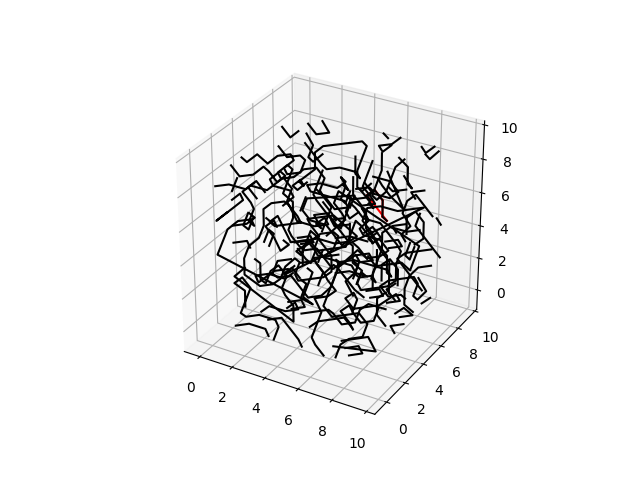

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X,Y,Z = [],[],[]
cycle = C.open_paths[-1]
subgraph = C.graph_res_networkx.subgraph(cycle).copy()

for edge in subgraph.edges:
    A,B = edge
    A = transform_res_to_point(C.mapping[A])
    B = transform_res_to_point(C.mapping[B])
    X.append(A[0])
    X.append(B[0])
    Y.append(A[1])
    Y.append(B[1])
    Z.append(A[2])
    Z.append(B[2])
    ax.plot([A[0],B[0]],[A[1],B[1]],[A[2],B[2]],color="red")

for D in C.open_paths:
    X1,Y1,Z1 = [],[],[]
    for point in D:
        point = transform_res_to_point(C.mapping[point])
        X1.append(point[0])
        Y1.append(point[1])
        Z1.append(point[2])
    ax.plot(X1,Y1,Z1,color="black")
    X = X+X1
    Y = Y+Y1
    Z = Z+Z1

# for edge in [a,b]:
#     p1,p2 = edge
#     p1 = transform_res_to_point(C.mapping[p1])
#     p2 = transform_res_to_point(C.mapping[p2])
#     ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],color="blue")

ref_ = Refine_cycle([C.mapping[point] for point in cycle]+ [C.mapping[cycle[0]]])

# for point in Badpoints:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

# for square in ref_.squares:
#     A,B,M = [],[],[]
#     mean_point = np.mean(np.array(square)[:4],axis=0)
#     mean_point = tuple(mean_point)
#     if True:
#         for point in square+[square[0]]:
#             A.append(point[0])
#             B.append(point[1])
#             M.append(point[2])
#         ax.plot(A,B,M)

# X = X+A
# Y = Y+B
# Z = Z+M

# for point in degree_2:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

X,Y,Z = np.array(X),np.array(Y),np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 1

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [34]:
len(C.cycles)

7

In [2]:
C.graph_res_networkx.neighbors(a[0])

NameError: name 'C' is not defined